<h3>Bibliotecas</h3>

In [41]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.model_selection import train_test_split, cross_val_score, validation_curve
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report,confusion_matrix
from math import sqrt

In [42]:
#Lendo os dados, usamos o mesmo dataset fornecido na primeira questão
dados = pd.read_csv('dados-ex5.txt') 
print(dados.shape)
dados.describe().transpose()

(899, 3)


,count,mean,std,min,25%,50%,75%,max
7.717444034211737858e-01,899.0,0.482540,0.872789,-1.361969,-0.098841,0.497590,1.095432,2.474448
-5.480857562296221897e-01,899.0,0.235173,0.532708,-0.956339,-0.228715,0.257811,0.674589,1.405710
1.000000000000000000e+00,899.0,0.499444,0.500278,0.000000,0.000000,0.000000,1.000000,1.000000


In [43]:
#Coluna Alvo
target_column = ['1.000000000000000000e+00'] 
predicao = list(set(list(dados.columns))-set(target_column))
dados[predicao] = dados[predicao]/dados[predicao].max()
dados.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
7.717444034211737858e-01,899.0,0.195009,0.352721,-0.550413,-0.039945,0.201091,0.442698,1.0
-5.480857562296221897e-01,899.0,0.167299,0.378960,-0.680324,-0.162704,0.183402,0.479892,1.0
1.000000000000000000e+00,899.0,0.499444,0.500278,0.000000,0.000000,0.000000,1.000000,1.0


<h3>Treino de 70% e teste de 30%</h3>

In [44]:
X = dados[predicao].values
y = dados[target_column].values

X_treino, X_test, y_treino, y_test = train_test_split(X, y, test_size=0.30, random_state=40)

print(X_treino.shape)
print(X_test.shape)

(629, 2)
(270, 2)


<h3>Modelo MLP</h3>

In [45]:
mlp = MLPClassifier(hidden_layer_sizes=(50,50,50,50,50,50,50), max_iter=100, alpha=1e-4, activation='relu',
                    solver='adam', verbose=10, random_state=1,
                    learning_rate_init=.1)

<h3>Curva de Aprendizado</h3>

/home/danilo/Área de Trabalho/RNA/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Iteration 1, loss = 2.52725291
Iteration 2, loss = 0.95216798
Iteration 3, loss = 0.71141401
Iteration 4, loss = 0.69886258
Iteration 5, loss = 0.69387522
Iteration 6, loss = 0.60223397
Iteration 7, loss = 0.45250714
Iteration 8, loss = 0.42542081
Iteration 9, loss = 0.39974533
Iteration 10, loss = 0.37152359
Iteration 11, loss = 0.32885258
Iteration 12, loss = 0.32730531
Iteration 13, loss = 0.32161331
Iteration 14, loss = 0.30419243
Iteration 15, loss = 0.33887257
Iteration 16, loss = 0.32407210
Iteration 17, loss = 0.30820707
Iteration 18, loss = 0.29989601
Iteration 19, loss = 0.29683817
Iteration 20, loss = 0.29855014
Iteration 21, loss = 0.29005362
Iteration 22, loss = 0.31332441
Iteration 23, loss = 0.29019702
Iteration 24, loss = 0.35715020
Iteration 25, loss = 0.30870306
Iteration 26, loss = 0.31020854
Iteration 27, loss = 0.28892428
Iteration 28, loss = 0.27777484
Iteration 29, loss = 0.26731120
Iteration 30, loss = 0.26979033
Iteration 31, loss = 0.29431708
Iteration 32, los

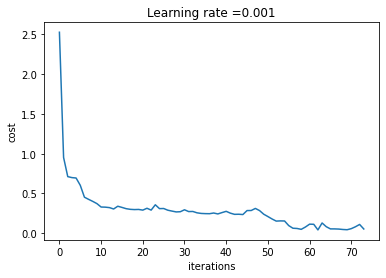

In [46]:
mlp.fit(X_treino,y_treino)
plt.ylabel('cost')
plt.xlabel('iterations')
plt.title("Learning rate =" + str(0.001))
plt.plot(mlp.loss_curve_)
plt.show()

<h3>Acurácia ao longo das épocas</h3>

epoch:  0
Iteration 75, loss = 0.07246200
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 76, loss = 0.08862635
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 77, loss = 0.06697522
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 78, loss = 0.08160174
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 79, loss = 0.06079943
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
epoch:  1
Iteration 80, loss = 0.07883276
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 81, loss = 0.07666139
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 82, loss = 0.03304087
Iteration 83, loss = 0.06429174
Iteration 84, loss = 0.02009360
epoch:  2
Iteration 85, loss =

/home/danilo/Área de Trabalho/RNA/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/danilo/Área de Trabalho/RNA/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/danilo/Área de Trabalho/RNA/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/danilo/Área de Trabalho/RNA/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

Iteration 95, loss = 0.02596928
Iteration 96, loss = 0.03649295
Iteration 97, loss = 0.02098440
Iteration 98, loss = 0.03116927
Iteration 99, loss = 0.01194128
epoch:  5
Iteration 100, loss = 0.00997751
Iteration 101, loss = 0.01200966
Iteration 102, loss = 0.01340649
Iteration 103, loss = 0.04265018
Iteration 104, loss = 0.04210785
epoch:  6
Iteration 105, loss = 0.03139148
Iteration 106, loss = 0.01084083
Iteration 107, loss = 0.01088892
Iteration 108, loss = 0.04571742
Iteration 109, loss = 0.01701601
epoch:  7
Iteration 110, loss = 0.05650362
Iteration 111, loss = 0.01249801
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 112, loss = 0.01499146
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 113, loss = 0.01386140
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 114, loss = 0.01325284
Training loss did not improve more than tol=0

/home/danilo/Área de Trabalho/RNA/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/danilo/Área de Trabalho/RNA/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/danilo/Área de Trabalho/RNA/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/danilo/Área de Trabalho/RNA/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

Iteration 116, loss = 0.05550288
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 117, loss = 0.01109223
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 118, loss = 0.01462203
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 119, loss = 0.01219829
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
epoch:  9
Iteration 120, loss = 0.03303452
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 121, loss = 0.01062334
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 122, loss = 0.02874526
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 123, loss = 0.01092239
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iterat

/home/danilo/Área de Trabalho/RNA/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/danilo/Área de Trabalho/RNA/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/danilo/Área de Trabalho/RNA/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/danilo/Área de Trabalho/RNA/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

Iteration 138, loss = 0.00687713
Iteration 139, loss = 0.03935095
epoch:  13
Iteration 140, loss = 0.00950072
Iteration 141, loss = 0.02843242
Iteration 142, loss = 0.01257772
Iteration 143, loss = 0.05222817
Iteration 144, loss = 0.00911778
epoch:  14
Iteration 145, loss = 0.00701729
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 146, loss = 0.04541018
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 147, loss = 0.00760115
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 148, loss = 0.02850026
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 149, loss = 0.00747640
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
epoch:  15
Iteration 150, loss = 0.00694410
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping

/home/danilo/Área de Trabalho/RNA/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/danilo/Área de Trabalho/RNA/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/danilo/Área de Trabalho/RNA/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/danilo/Área de Trabalho/RNA/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

Iteration 154, loss = 0.02990477
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
epoch:  16
Iteration 155, loss = 0.00832221
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 156, loss = 0.00798255
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 157, loss = 0.09687391
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 158, loss = 0.05092531
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 159, loss = 0.01654488
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
epoch:  17


/home/danilo/Área de Trabalho/RNA/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/danilo/Área de Trabalho/RNA/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/danilo/Área de Trabalho/RNA/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/danilo/Área de Trabalho/RNA/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

Iteration 160, loss = 0.01522642
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 161, loss = 0.10545638
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 162, loss = 0.07873730
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 163, loss = 0.04942275
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 164, loss = 0.04295780
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
epoch:  18
Iteration 165, loss = 0.12784860
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 166, loss = 0.05337655
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 167, loss = 0.02867563
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Itera

/home/danilo/Área de Trabalho/RNA/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/danilo/Área de Trabalho/RNA/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/danilo/Área de Trabalho/RNA/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/danilo/Área de Trabalho/RNA/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

Iteration 175, loss = 0.03210727
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 176, loss = 0.06760560
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 177, loss = 0.01141292
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 178, loss = 0.01681242
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 179, loss = 0.01054460
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
epoch:  21
Iteration 180, loss = 0.01752493
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 181, loss = 0.02965152
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 182, loss = 0.01767411
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Itera

/home/danilo/Área de Trabalho/RNA/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/danilo/Área de Trabalho/RNA/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/danilo/Área de Trabalho/RNA/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/danilo/Área de Trabalho/RNA/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

Iteration 190, loss = 0.02504796
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 191, loss = 0.03825612
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 192, loss = 0.00734238
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 193, loss = 0.01253459
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 194, loss = 0.04301435
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
epoch:  24
Iteration 195, loss = 0.03140928
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


/home/danilo/Área de Trabalho/RNA/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/danilo/Área de Trabalho/RNA/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/danilo/Área de Trabalho/RNA/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/danilo/Área de Trabalho/RNA/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

Iteration 196, loss = 0.01382195
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 197, loss = 0.04428836
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 198, loss = 0.00623284
Iteration 199, loss = 0.01679952
epoch:  25
Iteration 200, loss = 0.03231897
Iteration 201, loss = 0.00653826
Iteration 202, loss = 0.01232086


/home/danilo/Área de Trabalho/RNA/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/danilo/Área de Trabalho/RNA/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/danilo/Área de Trabalho/RNA/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/danilo/Área de Trabalho/RNA/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

Iteration 203, loss = 0.01954762
Iteration 204, loss = 0.02553009
epoch:  26
Iteration 205, loss = 0.00819591
Iteration 206, loss = 0.03621097
Iteration 207, loss = 0.02003330
Iteration 208, loss = 0.02271726
Iteration 209, loss = 0.01825654
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
epoch:  27


/home/danilo/Área de Trabalho/RNA/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/danilo/Área de Trabalho/RNA/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/danilo/Área de Trabalho/RNA/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/danilo/Área de Trabalho/RNA/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

Iteration 210, loss = 0.02575387
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 211, loss = 0.00738610
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 212, loss = 0.01642041
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 213, loss = 0.04038168
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 214, loss = 0.00655019
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
epoch:  28
Iteration 215, loss = 0.03237802
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


/home/danilo/Área de Trabalho/RNA/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/danilo/Área de Trabalho/RNA/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/danilo/Área de Trabalho/RNA/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/danilo/Área de Trabalho/RNA/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

Iteration 216, loss = 0.00647146
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 217, loss = 0.01731626
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 218, loss = 0.04911852
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 219, loss = 0.00446368
epoch:  29
Iteration 220, loss = 0.00539176
Iteration 221, loss = 0.05318929


/home/danilo/Área de Trabalho/RNA/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/danilo/Área de Trabalho/RNA/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/danilo/Área de Trabalho/RNA/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/danilo/Área de Trabalho/RNA/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

Iteration 222, loss = 0.00510694
Iteration 223, loss = 0.00928367
Iteration 224, loss = 0.03575019
epoch:  30
Iteration 225, loss = 0.02904145
Iteration 226, loss = 0.03609246
Iteration 227, loss = 0.01967850
Iteration 228, loss = 0.00457489
Iteration 229, loss = 0.00777718
epoch:  31


/home/danilo/Área de Trabalho/RNA/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/danilo/Área de Trabalho/RNA/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/danilo/Área de Trabalho/RNA/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/danilo/Área de Trabalho/RNA/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

Iteration 230, loss = 0.02508453
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 231, loss = 0.00681020
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 232, loss = 0.02665456
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 233, loss = 0.01912941
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 234, loss = 0.03352744
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
epoch:  32
Iteration 235, loss = 0.01475017
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


/home/danilo/Área de Trabalho/RNA/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/danilo/Área de Trabalho/RNA/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/danilo/Área de Trabalho/RNA/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/danilo/Área de Trabalho/RNA/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

Iteration 236, loss = 0.00562020
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 237, loss = 0.06358392
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 238, loss = 0.01941779
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 239, loss = 0.00508243
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
epoch:  33
Iteration 240, loss = 0.00416264
Iteration 241, loss = 0.07239564
Iteration 242, loss = 0.01675447
Iteration 243, loss = 0.01934701
Iteration 244, loss = 0.00759835
epoch:  34


/home/danilo/Área de Trabalho/RNA/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/danilo/Área de Trabalho/RNA/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/danilo/Área de Trabalho/RNA/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/danilo/Área de Trabalho/RNA/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

Iteration 245, loss = 0.05346215
Iteration 246, loss = 0.00580219
Iteration 247, loss = 0.01940825
Iteration 248, loss = 0.03779139
Iteration 249, loss = 0.00674638
epoch:  35
Iteration 250, loss = 0.00816020
Iteration 251, loss = 0.01851516
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 252, loss = 0.03629054
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 253, loss = 0.04114131
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 254, loss = 0.02557479
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
epoch:  36
Iteration 255, loss = 0.00533742
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 256, loss = 0.01961010
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 257, loss = 0.03751507
Training 

/home/danilo/Área de Trabalho/RNA/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/danilo/Área de Trabalho/RNA/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/danilo/Área de Trabalho/RNA/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/danilo/Área de Trabalho/RNA/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

Iteration 268, loss = 0.02566969
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 269, loss = 0.03448879
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
epoch:  39
Iteration 270, loss = 0.03474964
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 271, loss = 0.06663207
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 272, loss = 0.00693144
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 273, loss = 0.01895526
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 274, loss = 0.01563636
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
epoch:  40
Iteration 275, loss = 0.00758048
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stop

/home/danilo/Área de Trabalho/RNA/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/danilo/Área de Trabalho/RNA/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/danilo/Área de Trabalho/RNA/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/danilo/Área de Trabalho/RNA/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

Iteration 284, loss = 0.00866851
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
epoch:  42
Iteration 285, loss = 0.00934310
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 286, loss = 0.04875234
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 287, loss = 0.00773818
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 288, loss = 0.00674519
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 289, loss = 0.02199969
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
epoch:  43
Iteration 290, loss = 0.00868600
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 291, loss = 0.00561633
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stop

/home/danilo/Área de Trabalho/RNA/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/danilo/Área de Trabalho/RNA/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/danilo/Área de Trabalho/RNA/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/danilo/Área de Trabalho/RNA/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

epoch:  46
Iteration 305, loss = 0.00715207
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 306, loss = 0.07939488
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 307, loss = 0.02261747
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 308, loss = 0.01369319
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 309, loss = 0.01641165
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
epoch:  47
Iteration 310, loss = 0.01525928
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 311, loss = 0.02306683
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 312, loss = 0.02338573
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stop

/home/danilo/Área de Trabalho/RNA/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/danilo/Área de Trabalho/RNA/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/danilo/Área de Trabalho/RNA/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/danilo/Área de Trabalho/RNA/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

epoch:  49
Iteration 320, loss = 0.04690797
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 321, loss = 0.01434157
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 322, loss = 0.04178380
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 323, loss = 0.06511255
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 324, loss = 0.01118979
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
epoch:  50
Iteration 325, loss = 0.03010930
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 326, loss = 0.04838983
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 327, loss = 0.11404197
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stop

/home/danilo/Área de Trabalho/RNA/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/danilo/Área de Trabalho/RNA/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/danilo/Área de Trabalho/RNA/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/danilo/Área de Trabalho/RNA/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 338, loss = 0.00809537
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 339, loss = 0.07889050
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
epoch:  53
Iteration 340, loss = 0.06087596
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 341, loss = 0.00794224
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 342, loss = 0.01017395
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 343, loss = 0.02297738
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 344, loss = 0.05192814
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
epoch:  54
Iteration 345, loss = 0.010

/home/danilo/Área de Trabalho/RNA/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/danilo/Área de Trabalho/RNA/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/danilo/Área de Trabalho/RNA/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/danilo/Área de Trabalho/RNA/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

Iteration 353, loss = 0.06801698
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 354, loss = 0.01804975
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
epoch:  56
Iteration 355, loss = 0.00680974
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 356, loss = 0.04031848
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 357, loss = 0.01428899
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 358, loss = 0.02504997
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 359, loss = 0.01207820
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
epoch:  57
Iteration 360, loss = 0.03100515
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stop

/home/danilo/Área de Trabalho/RNA/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/danilo/Área de Trabalho/RNA/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/danilo/Área de Trabalho/RNA/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/danilo/Área de Trabalho/RNA/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

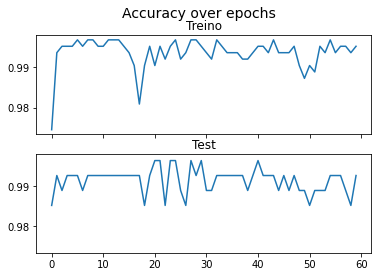

In [47]:
N_TREINO = X_treino.shape[0]
N_EPOCHS = 60
N_BATCH = 128
N_CLASSES = np.unique(y_treino)
scores_treino = []
scores_test = []
epoch = 0

while epoch < N_EPOCHS:
    print('epoch: ', epoch)
    random_perm = np.random.permutation(X_treino.shape[0])
    mini_batch_index = 0
    while True:
        indices = random_perm[mini_batch_index:mini_batch_index + N_BATCH]
        mlp.partial_fit(X_treino[indices], y_treino[indices], classes=N_CLASSES)
        mini_batch_index += N_BATCH

        if mini_batch_index >= N_TREINO:
            break
            
    # SCORE DO TREINO
    scores_treino.append(mlp.score(X_treino, y_treino))

    # SCORE TESTE
    scores_test.append(mlp.score(X_test, y_test))

    epoch += 1

fig, ax = plt.subplots(2, sharex=True, sharey=True)
ax[0].plot(scores_treino)
ax[0].set_title('Treino')
ax[1].plot(scores_test)
ax[1].set_title('Test')
fig.suptitle("Accuracy over epochs", fontsize=14)
plt.show()